In [33]:
import pandas as pd
data = pd.read_csv(r'C:\Users\Martin\Documents\kaggle\Superstore.csv', encoding='latin1')
print(data.info())  # Informace o datech
print(data.describe())  # Statistické souhrny

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [34]:
print(data.isnull().sum())  # Kontrola chybějících hodnot

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [35]:
top_customers = data.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False)
print(top_customers.head(10))

Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


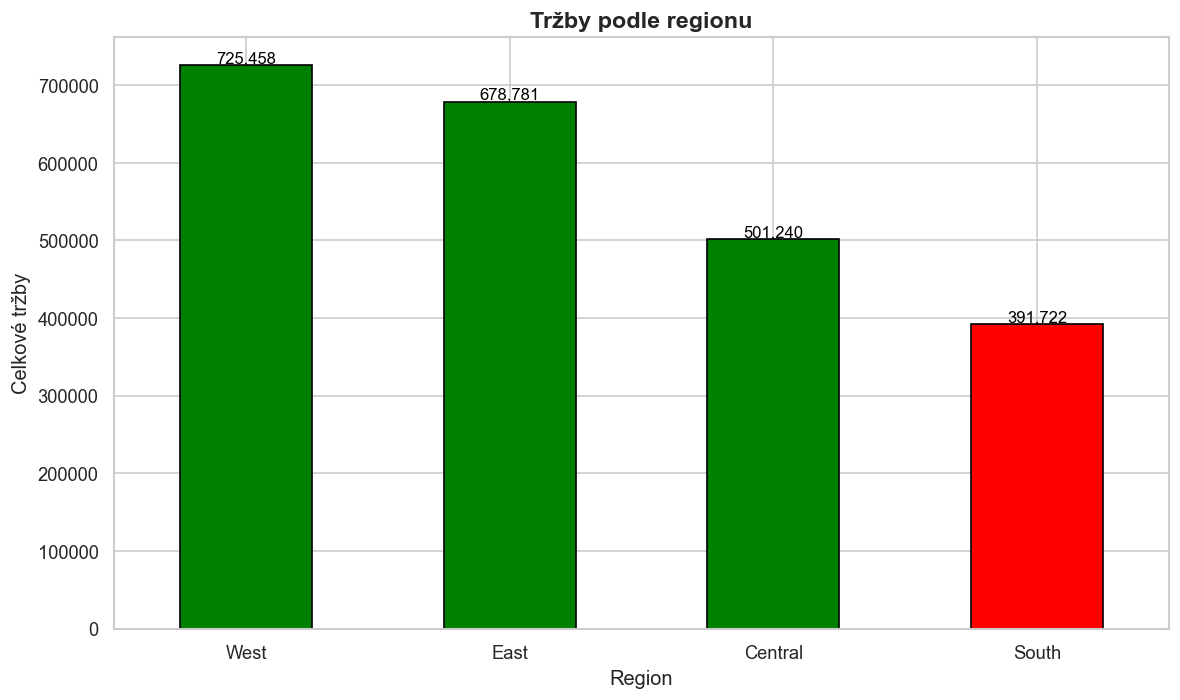

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Načtení dat
data = pd.read_csv(r'C:\Users\Martin\Documents\kaggle\Superstore.csv', encoding='latin1')

# Skupina tržeb podle regionu
region_sales = data.groupby("Region")["Sales"].sum()

# Seřazení regionů podle velikosti tržeb
region_sales_sorted = region_sales.sort_values(ascending=False)

# Nastavení Seaborn stylu
sns.set(style="whitegrid")

# Vytvoření grafu
plt.figure(figsize=(10, 6), dpi=120)  # Velikost a rozlišení grafu
colors = ['red' if val < 500000 else 'green' for val in region_sales_sorted]  # Barvy na základě hodnot

ax = region_sales_sorted.plot(kind='bar', color=colors, edgecolor='black')

# Přidání popisků hodnot na vrchol sloupců
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Formátování na celé číslo s čárkou jako oddělovačem
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Úprava názvů os a grafu
plt.title("Tržby podle regionu", fontsize=14, fontweight='bold')
plt.xlabel("Region", fontsize=12)
plt.ylabel("Celkové tržby", fontsize=12)
plt.xticks(rotation=0)  # Popisky osy X zůstanou vodorovně

plt.tight_layout()  # Úprava okrajů grafu
plt.show()

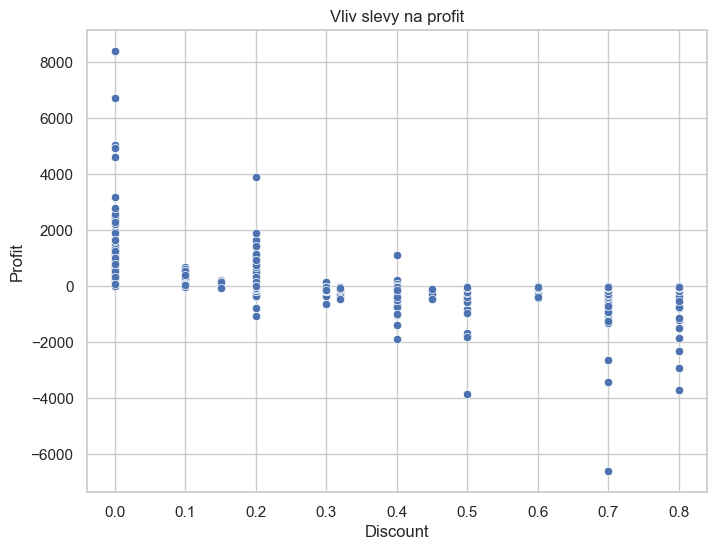

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x="Discount", y="Profit", data=data)
plt.title("Vliv slevy na profit")
plt.show()

In [38]:
avg_profit_category = data.groupby("Category")["Profit"].mean()
print(avg_profit_category)

Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64


In [39]:
top_products = data.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(5)
print(top_products)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64


In [46]:
city_orders = data["City"].value_counts().head(10)
print(city_orders)

City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: count, dtype: int64


c:\Users\Martin\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


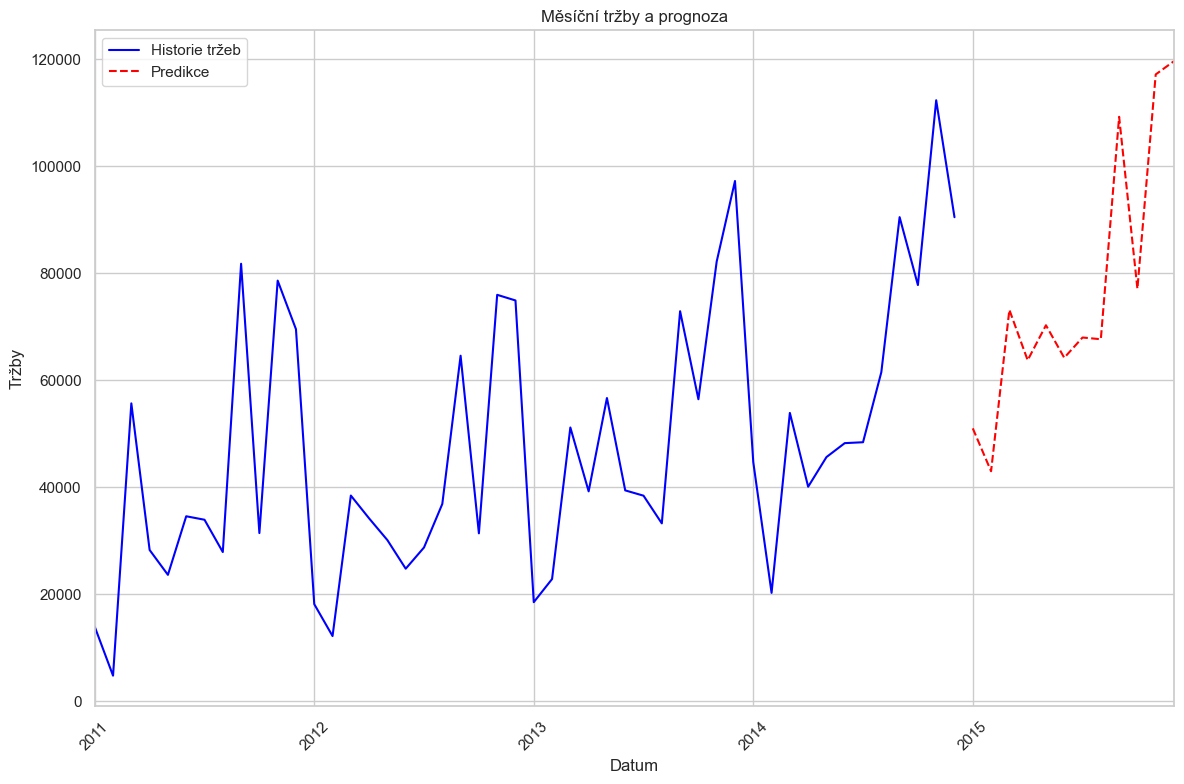

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Načteme data
data = pd.read_csv(r'C:\Users\Martin\Documents\kaggle\Superstore.csv', encoding='latin1')

# Převedeme sloupec 'Order Date' na datetime formát
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')

# Nastavíme 'Order Date' jako index
data.set_index('Order Date', inplace=True)

# Spočítáme měsíční tržby
monthly_sales = data['Sales'].resample('M').sum()

# Vytvoření modelu exponenciálního vyhlazování
model = ExponentialSmoothing(monthly_sales, trend='add', seasonal='add', seasonal_periods=12)
fitted_model = model.fit()

# Predikce na základě modelu
forecast = fitted_model.forecast(steps=12)  # Předpověď pro 12 měsíců

# Vykreslíme graf
plt.figure(figsize=(12, 8))

# Měsíční tržby
monthly_sales.plot(label='Historie tržeb', color='blue')

# Prognóza (predikce)
forecast.plot(label='Predikce', color='red', linestyle='--')

plt.title("Měsíční tržby a prognoza")
plt.xlabel("Datum")
plt.ylabel("Tržby")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [54]:
import pandas as pd

# Předpokládaný dataframe
data = pd.read_csv(r'C:\Users\Martin\Documents\kaggle\Superstore.csv',encoding='latin1')

# Převod 'Ship Date' na datetime
data['Ship Date'] = pd.to_datetime(data['Ship Date'], errors='coerce')

# Extrahování roku
data['Year'] = data['Ship Date'].dt.year

# Počítání počtu objednávek podle roku
orders_per_year = data['Year'].value_counts()

# Tisk počtu objednávek podle roku
print(orders_per_year)

Year
2014.0    1296
2013.0    1006
2012.0     827
2011.0     701
2015.0      48
Name: count, dtype: int64


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definice modelu
rf = RandomForestRegressor(random_state=42)

# Parametry pro ladění
param_grid = {
    'n_estimators': [100, 200, 300],  # Počet stromů
    'max_depth': [None, 10, 20, 30],   # Maximální hloubka stromu
    'min_samples_split': [2, 5, 10],   # Minimální počet vzorků pro rozdělení
    'min_samples_leaf': [1, 2, 4],     # Minimální počet vzorků v listu
    'max_features': ['sqrt', None],    # Maximální počet funkcí pro každý strom
}

# Definice křížové validace
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Trénování modelu s laděním hyperparametrů
grid_search.fit(X_train, y_train)

# Nejlepší parametry
print("Nejlepší parametry: ", grid_search.best_params_)

# Predikce s nejlepšími parametry
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Hodnocení modelu
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Optimalizovaný model - Mean Squared Error: {mse}")
print(f"Optimalizovaný model - R²: {r2}")

Nejlepší parametry:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Optimalizovaný model - Mean Squared Error: 43344.31216006983
Optimalizovaný model - R²: 0.10602867420473527


In [61]:
print("Koeficienty:", model.coef_)
print("Intercept:", model.intercept_)

Koeficienty: [-242.24411553    7.16537682]
Intercept: 41.650924302814985


In [62]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Definice modelu
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Trénování modelu
xgb_model.fit(X_train, y_train)

# Predikce a hodnocení
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - Mean Squared Error: {mse_xgb}")
print(f"XGBoost - R²: {r2_xgb}")

XGBoost - Mean Squared Error: 43442.684332398516
XGBoost - R²: 0.10399975975355491


In [63]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Parametry k ladění
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 1]
}

# Definice modelu
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Definice GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Trénování s křížovou validací
grid_search.fit(X_train, y_train)

# Zobrazení nejlepších parametrů
print("Nejlepší parametry: ", grid_search.best_params_)

# Vyhodnocení modelu s nejlepšími parametry
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Výpočet MSE a R²
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Optimalizovaný model - Mean Squared Error: {mse}")
print(f"Optimalizovaný model - R²: {r2}")

c:\Users\Martin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Nejlepší parametry:  {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}
Optimalizovaný model - Mean Squared Error: 43426.00927660537
Optimalizovaný model - R²: 0.1043436808124486


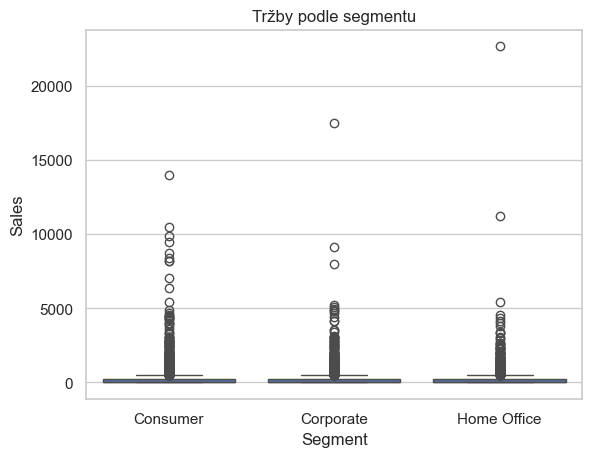

In [64]:
sns.boxplot(x="Segment", y="Sales", data=data)
plt.title("Tržby podle segmentu")
plt.show()

In [65]:
loss_products = data[data["Profit"] < 0]
print(loss_products[['Product Name', 'Sales', 'Profit']].head(10))

                                         Product Name      Sales     Profit
3       Bretford CR4500 Series Slim Rectangular Table   957.5775  -383.0310
14  Holmes Replacement Filter for HEPA Air Cleaner...    68.8100  -123.8580
15   Storex DuraTech Recycled Plastic Frosted Binders     2.5440    -3.8160
23                 Global Deluxe Stacking Chair, Gray    71.3720    -1.0196
27  Riverside Palais Royal Lawyers Bookcase, Royal...  3083.4300 -1665.0522
28  Avery Recycled Flexi-View Covers for Binding S...     9.6180    -7.0532
32  Acco Pressboard Covers with Storage Hooks, 14 ...     6.8580    -5.7150
36  Electrix Architect's Clamp-On Swing Arm Lamp, ...   190.9200  -147.9630
38  Atlantic Metals Mobile 3-Shelf Bookcases, Cust...   532.3992   -46.9764
39           Global Fabric Manager's Chair, Dark Gray   212.0580   -15.1470


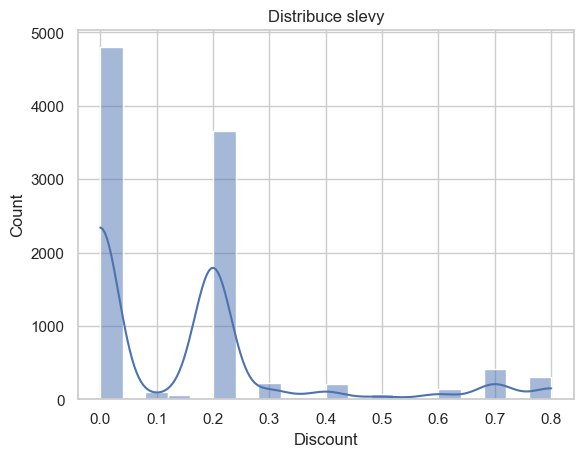

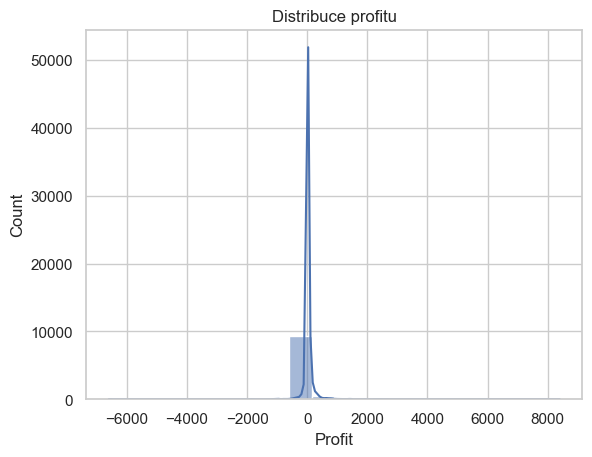

In [66]:
sns.histplot(data['Discount'], kde=True, bins=20)
plt.title("Distribuce slevy")
plt.show()

sns.histplot(data['Profit'], kde=True, bins=20)
plt.title("Distribuce profitu")
plt.show()